# Validation des résultats

In [1]:
import pandas as pd
import yfinance as yf
import yahoofinancials
import numpy as np
import math
import matplotlib

In [2]:
Date_debut = '2018-01-01'
Date_fin = '2018-04-02'

In [3]:
def get_tickertop10(fichiercsv):
    Tabl = pd.read_csv(fichiercsv, sep=';', index_col=0)
    return Tabl

In [4]:
def get_rendement(tickers,Date_debut,Date_fin):
    Tableau_rendement=pd.DataFrame()
    for ticker in tickers:
        Tableau_rendement[ticker] = yf.download(ticker,start= Date_debut,end=Date_fin,progress=False,interval='1mo')['Adj Close'].dropna()
        Tableau_rendement[ticker] = Tableau_rendement[ticker].pct_change(periods=3)*100
    return Tableau_rendement

In [5]:
def comparaison(index,tickers,Date_debut,Date_fin):
    Tableau_rendement_ref = get_rendement([index],Date_debut,Date_fin)
    print(Tableau_rendement_ref)
    Tableau_rendement_top10 = get_rendement(tickers,Date_debut,Date_fin)
    print(Tableau_rendement_top10)
    nombre=0
    for i in range(len(np.transpose(Tableau_rendement_top10))):
        if Tableau_rendement_top10.iloc[-1,i]!='nan':
            nombre+=1
    '''
    for i in range(len(np.transpose(Tableau_rendement_top10))):
        print(Tableau_rendement_top10.iloc[-1,i])
        if Tableau_rendement_top10.iloc[-1,i]!='nan':
            if Tableau_rendement_top10.iloc[-1,i]>Tableau_rendement_ref.iloc[-1,0]:
                nombre+=1
                Tableau_rendement_top10.iloc[-1,i]=1
            elif Tableau_rendement_top10.iloc[-1,i]<Tableau_rendement_ref.iloc[-1,0]:
                Tableau_rendement_top10.iloc[-1,i]=0
                nombre+=1
    print(Tableau_rendement_top10)
    print(nombre)
    '''
    return Tableau_rendement_top10,nombre,Tableau_rendement_ref

In [6]:
tabl = get_tickertop10('donnees_top10_1.csv')
top10 = tabl.iloc[:,2:]
date_complet = tabl.iloc[:,0:2]
ind = []
Tableau_final = []
nombres=[]
reference=[]
i=0
date_complet.iloc[0,1]
while i<len(tabl):
    Tableau_global,nombre,ref = comparaison('^GSPTSE',top10.iloc[i,:],date_complet.iloc[i,0],date_complet.iloc[i,1])
    ind.append(date_complet.iloc[i,1][0:8]+'01')
    Tableau_final.append(Tableau_global.iloc[-1,:].sum()/nombre)
    reference.append(ref.iloc[-1,0])
    nombres.append(nombre)
    i+=1
Tableau_fin = pd.DataFrame(np.transpose([Tableau_final,np.transpose(reference)]),columns = ['Top10','TSX'])

              ^GSPTSE
Date                 
2010-01-01        NaN
2010-02-01        NaN
2010-03-01        NaN
2010-04-01  10.062829

1 Failed download:
- DDC.TO: No data found for this date range, symbol may be delisted

1 Failed download:
- BPO-PR.TO: Data doesn't exist for startDate = 1262322000, endDate = 1270699200

1 Failed download:
- BPY-UN.TO: Data doesn't exist for startDate = 1262322000, endDate = 1270699200

1 Failed download:
- BEP-UN.TO: No data found for this date range, symbol may be delisted

1 Failed download:
- CEF.TO: Data doesn't exist for startDate = 1262322000, endDate = 1270699200
            DDC.TO   BPO-PR.TO   BPY-UN.TO   BEP-UN.TO    AAV.TO     DGC.TO  \
Date                                                                          
2010-01-01     NaN         NaN         NaN         NaN       NaN        NaN   
2010-02-01     NaN         NaN         NaN         NaN       NaN        NaN   
2010-03-01     NaN         NaN         NaN         NaN       NaN        N

             CCL-B.TO   BAM-A.TO     DGC.TO   CRT-UN.TO    BNS.TO    BMO.TO  \
Date                                                                          
2011-10-01        NaN        NaN        NaN         NaN       NaN       NaN   
2011-11-01        NaN        NaN        NaN         NaN       NaN       NaN   
2011-12-01        NaN        NaN        NaN         NaN       NaN       NaN   
2012-01-01  12.752525   6.637484 -15.090908         NaN -0.885733  0.137837   

              CPX.TO    BAD.TO   EIT-UN.TO   BEI-UN.TO  
Date                                                    
2011-10-01       NaN       NaN         NaN         NaN  
2011-11-01       NaN       NaN         NaN         NaN  
2011-12-01       NaN       NaN         NaN         NaN  
2012-01-01 -0.093637  15.57001   12.762479    8.812424  
             ^GSPTSE
Date                
2012-01-01       NaN
2012-02-01       NaN
2012-03-01       NaN
2012-04-01 -1.280898

1 Failed download:
- ZDY.TO: Data doesn't exist for star


1 Failed download:
- DDC.TO: No data found for this date range, symbol may be delisted

1 Failed download:
- BINGO.TO: No data found, symbol may be delisted

1 Failed download:
- BINGO.TO: No data found, symbol may be delisted

1 Failed download:
- BINGO.TO: No data found, symbol may be delisted

1 Failed download:
- BINGO.TO: No data found, symbol may be delisted
               BAD.TO   CCL-B.TO   DDC.TO     BMO.TO     BNS.TO   BYD-UN.TO  \
Date                                                                          
2014-01-01        NaN        NaN      NaN        NaN        NaN         NaN   
2014-02-01        NaN        NaN      NaN        NaN        NaN         NaN   
2014-03-01        NaN        NaN      NaN        NaN        NaN         NaN   
2014-04-01  23.587618   25.70399      NaN  12.379097  11.142782   26.116183   

            BINGO.TO  
Date                  
2014-01-01       NaN  
2014-02-01       NaN  
2014-03-01       NaN  
2014-04-01       NaN  
             ^GSPTS


1 Failed download:
- DH.TO: No data found for this date range, symbol may be delisted
            DDC.TO     DGC.TO   DH.TO   CCL-B.TO      BB.TO     AFN.TO  \
Date                                                                     
2016-01-01     NaN        NaN     NaN        NaN        NaN        NaN   
2016-02-01     NaN        NaN     NaN        NaN        NaN        NaN   
2016-03-01     NaN        NaN     NaN        NaN        NaN        NaN   
2016-04-01     NaN  57.922526     NaN  17.604942 -11.311313  32.562801   

              CPX.TO    AAV.TO   ZAG.TO   BAM-A.TO  
Date                                                
2016-01-01       NaN       NaN      NaN        NaN  
2016-02-01       NaN       NaN      NaN        NaN  
2016-03-01       NaN       NaN      NaN        NaN  
2016-04-01 -3.712728 -6.013072  0.88343   0.735595  
             ^GSPTSE
Date                
2016-04-01       NaN
2016-05-01       NaN
2016-06-01       NaN
2016-07-01  4.524246
             AP-UN.TO   


1 Failed download:
- BPO-PR-A.TO: No data found, symbol may be delisted
            EIT-UN.TO   BIP-UN.TO   BPO-PR-A.TO   BPY-UN.TO   BEP-UN.TO  \
Date                                                                      
2018-04-01        NaN         NaN           NaN         NaN         NaN   
2018-05-01        NaN         NaN           NaN         NaN         NaN   
2018-06-01        NaN         NaN           NaN         NaN         NaN   
2018-07-01   4.325548    2.454521           NaN    8.279923    2.470406   

             DSG.TO    CFP.TO     BAD.TO     CIX.TO   ZLB.TO  
Date                                                          
2018-04-01      NaN       NaN        NaN        NaN      NaN  
2018-05-01      NaN       NaN        NaN        NaN      NaN  
2018-06-01      NaN       NaN        NaN        NaN      NaN  
2018-07-01  9.56522 -3.289248  19.982116 -14.686783  4.55441  
             ^GSPTSE
Date                
2018-07-01       NaN
2018-08-01       NaN
2018-09-01    

In [7]:
tabl

,Date_debut,Date_fin,1,2,3,4,5,6,7,8,9,10
1,2010-01-01,2010-04-08,DDC.TO,BPO-PR.TO,BPY-UN.TO,BEP-UN.TO,AAV.TO,DGC.TO,AFN.TO,BB.TO,CEF.TO,CAR-UN.TO
2,2010-04-01,2010-07-08,BTE.TO,ABX.TO,ZAG.TO,ZWB.TO,ZHY.TO,ZPR.TO,ZSP.TO,ZCN.TO,ZCS.TO,ZDY.TO
3,2010-07-01,2010-10-08,BLX.TO,CHE-UN.TO,BTE.TO,CLS.TO,BIR.TO,ARX.TO,CSH-UN.TO,ABX.TO,CAS.TO,CCL-B.TO
4,2010-10-01,2011-01-08,CM.TO,CNR.TO,CNQ.TO,CP.TO,REF-UN.TO,ZIC.TO,ZEA.TO,ZUE.TO,ZSP.TO,ZCN.TO
5,2011-01-01,2011-04-08,GIB-A.TO,CAE.TO,ALA.TO,ATD-B.TO,AGI.TO,ARX.TO,AQN.TO,BTO.TO,AP-UN.TO,AIF.TO
6,2011-04-01,2011-07-08,BAD.TO,BYD-UN.TO,CU.TO,BMO.TO,CWB.TO,BNS.TO,BINGO.TO,BINGO.TO,BINGO.TO,BINGO.TO
7,2011-07-01,2011-10-08,GIB-A.TO,D-UN.TO,ZWB.TO,ZHY.TO,ZPR.TO,ZLB.TO,AC.TO,CEU.TO,CGG.TO,DRG-UN.TO
8,2011-10-01,2012-01-08,CCL-B.TO,BAM-A.TO,DGC.TO,CRT-UN.TO,BNS.TO,BMO.TO,CPX.TO,BAD.TO,EIT-UN.TO,BEI-UN.TO
9,2012-01-01,2012-04-08,BEI-UN.TO,ZDY.TO,BBD-B.TO,CTC-A.TO,CU.TO,CWB.TO,BAD.TO,ARX.TO,BINGO.TO,BINGO.TO
10,2012-04-01,2012-07-08,AGU.TO,DOL.TO,AFN.TO,BB.TO,AAV.TO,CEF.TO,ZAG.TO,ZWB.TO,BINGO.TO,BINGO.TO


In [8]:
Tableau_comparatif = Tableau_fin['Top10']-Tableau_fin['TSX']

In [9]:
Tableau_fin

,Top10,TSX
0,6.626003,10.062829
1,-0.583023,-4.072656
2,6.090808,8.219644
3,4.003917,6.909009
4,1.038094,2.898464
5,6.703170,-7.165396
6,-0.894469,-5.357033
7,4.060248,1.633194
8,5.400231,-1.280898
9,-2.829966,-5.108723


In [10]:
Tableau_comparatif.sum()

46.29036405597615

In [11]:
Tableau_comparatif.std()

4.212180723511481

In [12]:
Tableau_comparatif

0     -3.436825
1      3.489633
2     -2.128836
3     -2.905091
4     -1.860370
5     13.868566
6      4.462564
7      2.427054
8      6.681129
9      2.278757
10    -1.616182
11     2.723726
12     1.802890
13     1.045347
14    -1.635023
15    -2.888293
16     7.144807
17    -5.074614
18     2.829352
19    -1.748788
20     2.103605
21     2.047152
22     2.813490
23    -0.255091
24     0.058985
25     2.231655
26     7.117013
27    -3.686125
28     0.949126
29     0.563795
30    -2.141642
31     2.372984
32     3.597481
33    -1.927219
34     3.196324
35    -7.030850
36    -6.263552
37     9.852960
38     2.211791
39     3.018678
dtype: float64

Text(0, 0.5, 'Rendement(%)')

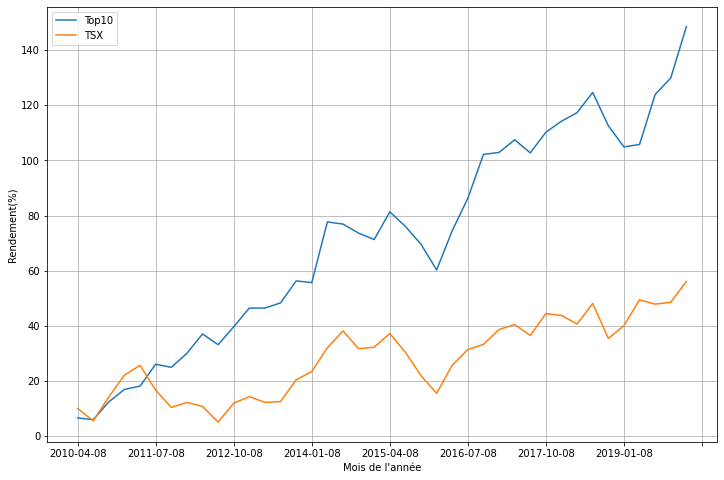

In [29]:
Tableau_fin.index = tabl['Date_fin']
ax=(((Tableau_fin+100)/100).cumprod()*100-100).plot(grid='on',figsize=(12, 8))
ax.set_xlabel("Mois de l'année")
ax.set_ylabel("Rendement(%)")

,Top10,TSX
1,6.626003,10.062829
2,-0.583023,-4.072656
3,6.090808,8.219644
4,4.003917,6.909009
5,1.038094,2.898464
6,6.703170,-7.165396
7,-0.894469,-5.357033
8,4.060248,1.633194
9,5.400231,-1.280898
10,-2.829966,-5.108723


,Date_debut,Date_fin,1,2,3,4,5,6,7,8,9,10
1,2010-01-01,2010-04-08,DDC.TO,BPO-PR.TO,BPY-UN.TO,BEP-UN.TO,AAV.TO,DGC.TO,AFN.TO,BB.TO,CEF.TO,CAR-UN.TO
2,2010-04-01,2010-07-08,BTE.TO,ABX.TO,ZAG.TO,ZWB.TO,ZHY.TO,ZPR.TO,ZSP.TO,ZCN.TO,ZCS.TO,ZDY.TO
3,2010-07-01,2010-10-08,BLX.TO,CHE-UN.TO,BTE.TO,CLS.TO,BIR.TO,ARX.TO,CSH-UN.TO,ABX.TO,CAS.TO,CCL-B.TO
4,2010-10-01,2011-01-08,CM.TO,CNR.TO,CNQ.TO,CP.TO,REF-UN.TO,ZIC.TO,ZEA.TO,ZUE.TO,ZSP.TO,ZCN.TO
5,2011-01-01,2011-04-08,GIB-A.TO,CAE.TO,ALA.TO,ATD-B.TO,AGI.TO,ARX.TO,AQN.TO,BTO.TO,AP-UN.TO,AIF.TO
6,2011-04-01,2011-07-08,BAD.TO,BYD-UN.TO,CU.TO,BMO.TO,CWB.TO,BNS.TO,BINGO.TO,BINGO.TO,BINGO.TO,BINGO.TO
7,2011-07-01,2011-10-08,GIB-A.TO,D-UN.TO,ZWB.TO,ZHY.TO,ZPR.TO,ZLB.TO,AC.TO,CEU.TO,CGG.TO,DRG-UN.TO
8,2011-10-01,2012-01-08,CCL-B.TO,BAM-A.TO,DGC.TO,CRT-UN.TO,BNS.TO,BMO.TO,CPX.TO,BAD.TO,EIT-UN.TO,BEI-UN.TO
9,2012-01-01,2012-04-08,BEI-UN.TO,ZDY.TO,BBD-B.TO,CTC-A.TO,CU.TO,CWB.TO,BAD.TO,ARX.TO,BINGO.TO,BINGO.TO
10,2012-04-01,2012-07-08,AGU.TO,DOL.TO,AFN.TO,BB.TO,AAV.TO,CEF.TO,ZAG.TO,ZWB.TO,BINGO.TO,BINGO.TO
